In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from tqdm import tqdm

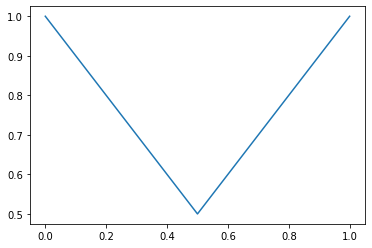

In [2]:
alpha = 0.4

def P_0(eta):
    return np.max([eta, 1-eta])
etas = np.linspace(0,1,101)
plt.plot(etas, [P_0(e) for e in etas])

In [3]:
def Prob(n,alpha,beta):
    p0 = np.exp(-(alpha+beta)**2)
    if n==0:
        return p0
    else:
        return 1-p0
    
def Prob_Outcome(n, alpha, beta, eta):
    q=0
    for a,et in zip([alpha, -alpha], [eta, 1-eta]):
       q+= et*Prob(n,a,beta)
    return q

def Postirior(n, alpha, beta, eta):
    po = Prob(n, alpha, beta)*eta
    po /= Prob_Outcome(n, alpha, beta, eta)
    return po

In [4]:
def P_1(beta, eta):
    p=0
    for n in [0,1]:
        p+= Prob_Outcome(n, alpha, beta,eta)*P_0(Postirior(n, alpha, beta,eta))
    return 1-p

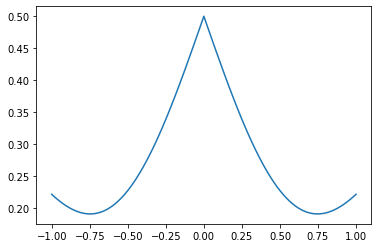

In [5]:
betas = np.linspace(-1,1,101)
plt.plot(betas, [P_1(b,.5) for b in betas])

In [8]:
etas_min = np.linspace(0,.5,100)
PS = np.zeros((1,2*len(etas_min)))
BOPT = np.zeros((1,2*len(etas_min)))
for ind_eta, eta in enumerate(tqdm(etas_min)):
    optimization = optimize.minimize(P_1, alpha, args=(eta), method="BFGS")#,## bounds=((-1.2,1.2)))
    PS[0,ind_eta]=optimization.fun
    BOPT[0,ind_eta]=optimization.x

  0%|          | 0/100 [00:00<?, ?it/s]/home/cooper-cooper/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
100%|██████████| 100/100 [00:00<00:00, 242.37it/s]


In [11]:
%timeit optimize.minimize(P_1, alpha, args=(eta), method="BFGS")#,## bounds=((-1.2,1.2)))

2.64 ms ± 40.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
ps = {}
for method in ["Golden","Bounded","Brent"]:

    etas_min = np.linspace(0,.5,100)
    PS = np.zeros((1,2*len(etas_min)))
    BOPT = np.zeros((1,2*len(etas_min)))
    for ind_eta, eta in enumerate(tqdm(etas_min)):
        optimization = optimize.minimize_scalar(P_1, args=(eta), method=method, bounds=((-1.2,1.2)))
        PS[0,ind_eta]=optimization.fun
        BOPT[0,ind_eta]=optimization.x

    PS[0,len(etas_min):] = PS[0,:len(etas_min)][::-1]
    ps[method] = PS[0]

100%|██████████| 100/100 [00:00<00:00, 543.38it/s]


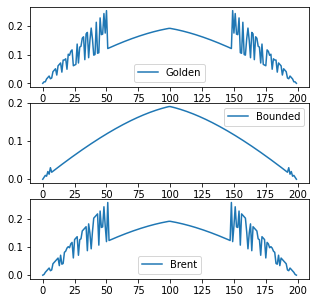

In [8]:
plt.figure(figsize=(5,5))
for ind,method in enumerate(ps.keys()):
    ax=plt.subplot2grid((3,1),(ind,0))
    ax.plot(ps[method], label=method)
    ax.legend()

In [9]:
give_lim= lambda eta,a : 2 if eta>0.01 else 2 #1.5

etas_min = np.linspace(1e-2,.5,100)
PS = np.zeros((1,2*len(etas_min)))
BOPT = np.zeros((1,2*len(etas_min)))
for ind_eta, eta in enumerate(tqdm(etas_min)):
    lim = give_lim(eta, alpha)
    optimization = optimize.minimize_scalar(P_1, args=(eta), method="bounded", bounds=((-lim, lim)), options={"maxiter":10**9, "xatol":1e-35})
    PS[0,ind_eta]=optimization.fun
    BOPT[0,ind_eta]=optimization.x

PS[0,len(etas_min):] = PS[0,:len(etas_min)][::-1]
BOPT[0,len(etas_min):] = -BOPT[0,:len(etas_min)][::-1]

100%|██████████| 100/100 [00:00<00:00, 618.55it/s]


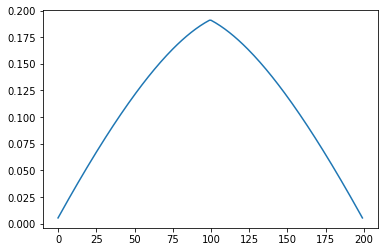

In [10]:
plt.plot(PS[0])

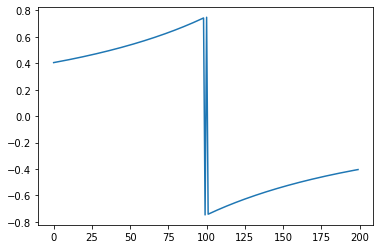

In [11]:
plt.plot(BOPT[0])

Some errors when $\eta \rightarrow 0$

In [12]:
give_lim= lambda eta,a : 2 if eta>0.01 else 3

etas_min = np.linspace(1e-5,.5,100)
PS = np.zeros((1,2*len(etas_min)))
BOPT = np.zeros((1,2*len(etas_min)))
for ind_eta, eta in enumerate(tqdm(etas_min)):
    lim = give_lim(eta, alpha)
    optimization = optimize.minimize_scalar(P_1, args=(eta), method="bounded", bounds=((-lim, lim)), options={"maxiter":10**9, "xatol":1e-35})
    PS[0,ind_eta]=optimization.fun
    BOPT[0,ind_eta]=optimization.x

PS[0,len(etas_min):] = PS[0,:len(etas_min)][::-1]
BOPT[0,len(etas_min):] = -BOPT[0,:len(etas_min)][::-1]

100%|██████████| 100/100 [00:00<00:00, 581.55it/s]


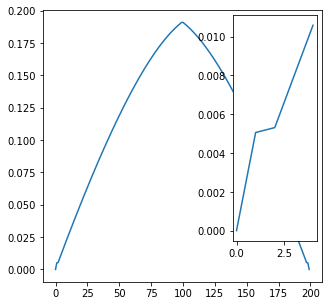

In [13]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
fig=plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.plot(PS[0])
axins = zoomed_inset_axes(ax, zoom=15)#,loc="lower right")
axins.plot(PS[0][:5])


¿qué pasa para $\eta \rightarrow 0$ ??

In [14]:
np.logspace(-6,-1,6)

array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01])

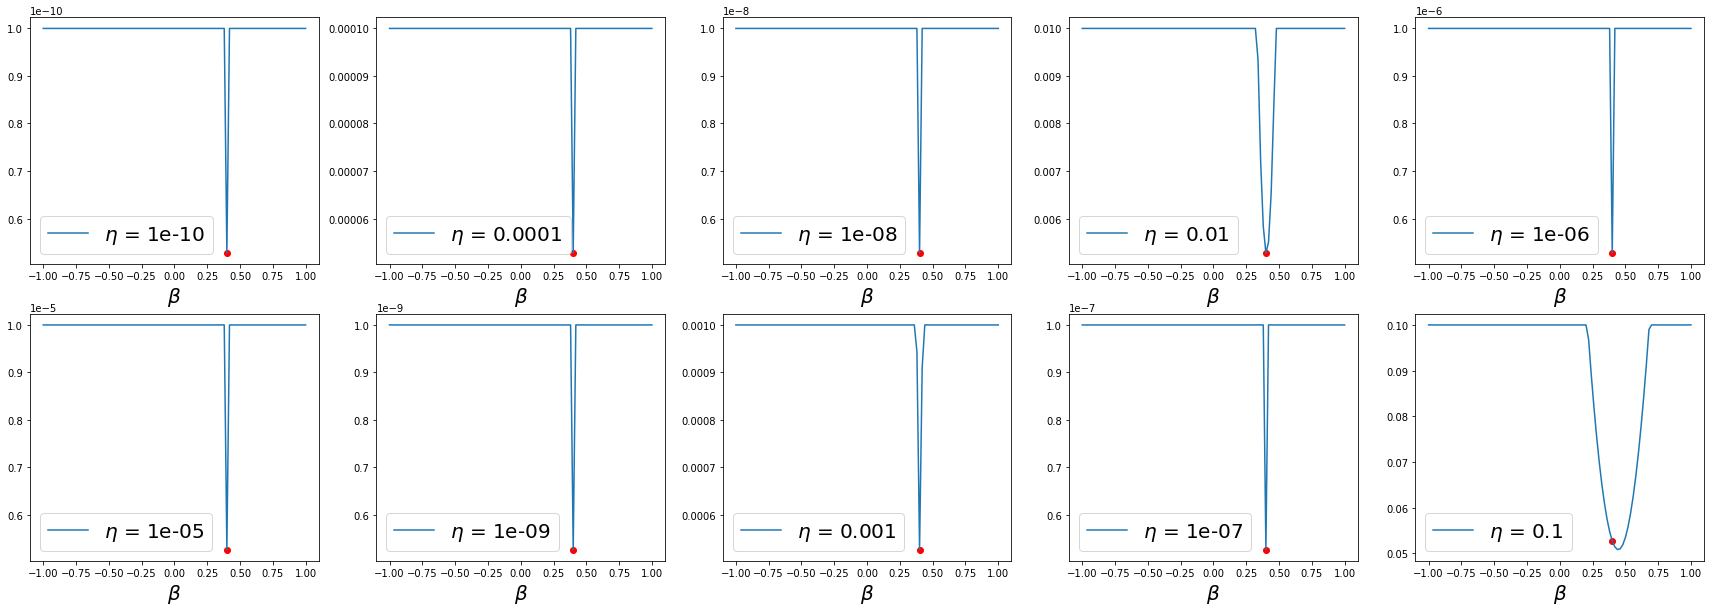

In [20]:
plt.figure(figsize=(30,10))
betas = np.linspace(-1,1,101)
for ind,et in enumerate(np.logspace(-10,-1,10)):
    ax = plt.subplot2grid((2,5),(ind%2, ind%5))
    ax.plot(betas, [P_1(b,et) for b in betas], label=r'$\eta$ = '+str(et))
    ax.scatter([alpha], [P_1(alpha,et)], color="red")#, label=r'$\eta$ = '+str(np.round(et,2)))
    ax.set_xlabel(r'$\beta$',size=20)
    ax.legend(prop={"size":20})

Considering the limits now

In [192]:
np.log10()

NameError: name 'a' is not defined

100%|██████████| 100/100 [00:00<00:00, 625.80it/s]


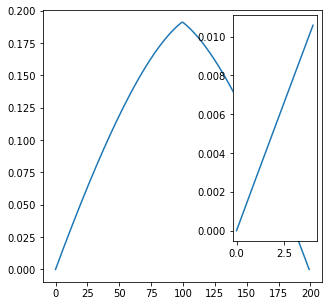

In [21]:
give_lim= lambda eta,a : 2 if eta>0.01 else a


etas_min = np.linspace(1e-10,.5,100)
PS = np.zeros((1,2*len(etas_min)))
BOPT = np.zeros((1,2*len(etas_min)))
for ind_eta, eta in enumerate(tqdm(etas_min)):
    
    if eta>0.01:
        bd = ((-2,2))
    else:
        bd = ((alpha-1e-5,alpha+1e-5))
    
    optimization = optimize.minimize_scalar(P_1, args=(eta), method="bounded", bounds = bd)#, bonuds= bounds=((-2,2)))#, options={"maxiter":10**9, "xatol":1e-35})
    PS[0,ind_eta]=optimization.fun
    BOPT[0,ind_eta]=optimization.x

PS[0,len(etas_min):] = PS[0,:len(etas_min)][::-1]
BOPT[0,len(etas_min):] = -BOPT[0,:len(etas_min)][::-1]


from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
fig=plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.plot(PS[0])
axins = zoomed_inset_axes(ax, zoom=15)#,loc="lower right")
axins.plot(PS[0][:5])
